# Build a CNN for image classification

# Objective 
To build and train a Convolutional Neural Network (CNN) using CIFAR dataset of images to classify images into predefined categories. Preprocess the data, build the architecture of CNN, train the model and evaluate its performance.

# Importing necessary packages

In [97]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
import warnings
warnings.filterwarnings('ignore')

# Load CIFAR-10 dataset

In [98]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize image data

In [99]:
train_images = train_images / 255.0
test_images = test_images / 255.0
train_images, val_images, train_labels, val_labels = tts(train_images, train_labels, test_size=0.15, random_state=42)

# Data augmentation

In [101]:
from sklearn.model_selection import train_test_split as tts # improve models robustness and helps to generalise well with different training samples
data_gen = ImageDataGenerator(
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
data_gen.fit(train_images)

# Display first few images with labels

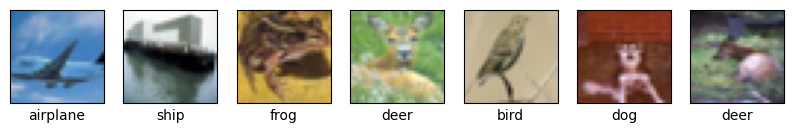

In [110]:
 import matplotlib.pyplot as plt
# Display the first few images and labels from the dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog','horse', 'ship', 'truck']
def show_images(images, labels, num_images):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(7, 7, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        # CIFAR-10 labels are between 0 and 9, so we need to map them to class␣names
        plt.xlabel(class_names[labels[i][0]])
    plt.show()
# Show the first 7 images from the training set
show_images(train_images, train_labels, 7)

# Define CNN architecture

In [111]:
def create_model():
    model = Sequential()
    # Convolution layer 1
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) # relu is used to add non-linearitry,computationally efficient,solves vansihing gradient problem
    model.add(MaxPooling2D((2, 2)))
    # Convolution layer 2
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    # Convolution layer 3
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    # Dropout layer
    model.add(Dropout(0.2))
    model.add(Flatten())
    # Fully connected layers
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model


# Compile model

In [115]:
model = create_model()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [116]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_39 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_39 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_40 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_40 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_41 (MaxPooling2D)      │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,202 (625.79 KB)

 Trainable params: 160,202 (625.79 KB)

 Non-trainable params: 0 (0.00 B)

# Train the model

In [118]:
history = model.fit(data_gen.flow(train_images, train_labels, batch_size=64), 
                     epochs=50, 
                     validation_data=(val_images,val_labels), 
                     verbose=2)

Epoch 1/50
665/665 - 55s - 82ms/step - accuracy: 0.7132 - loss: 0.8235 - val_accuracy: 0.7475 - val_loss: 0.7327
Epoch 2/50
665/665 - 54s - 81ms/step - accuracy: 0.7138 - loss: 0.8214 - val_accuracy: 0.7712 - val_loss: 0.6739
Epoch 3/50
665/665 - 52s - 79ms/step - accuracy: 0.7160 - loss: 0.8148 - val_accuracy: 0.7613 - val_loss: 0.6898
Epoch 4/50
665/665 - 57s - 85ms/step - accuracy: 0.7168 - loss: 0.8108 - val_accuracy: 0.7439 - val_loss: 0.7253
Epoch 5/50
665/665 - 53s - 80ms/step - accuracy: 0.7159 - loss: 0.8093 - val_accuracy: 0.7607 - val_loss: 0.6927
Epoch 6/50
665/665 - 55s - 82ms/step - accuracy: 0.7224 - loss: 0.7977 - val_accuracy: 0.7537 - val_loss: 0.6904
Epoch 7/50
665/665 - 55s - 83ms/step - accuracy: 0.7232 - loss: 0.7967 - val_accuracy: 0.7580 - val_loss: 0.6870
Epoch 8/50
665/665 - 55s - 83ms/step - accuracy: 0.7237 - loss: 0.7945 - val_accuracy: 0.7609 - val_loss: 0.6807
Epoch 9/50
665/665 - 54s - 81ms/step - accuracy: 0.7287 - loss: 0.7855 - val_accuracy: 0.7595 - 

# Plot training and validation loss at each epoch

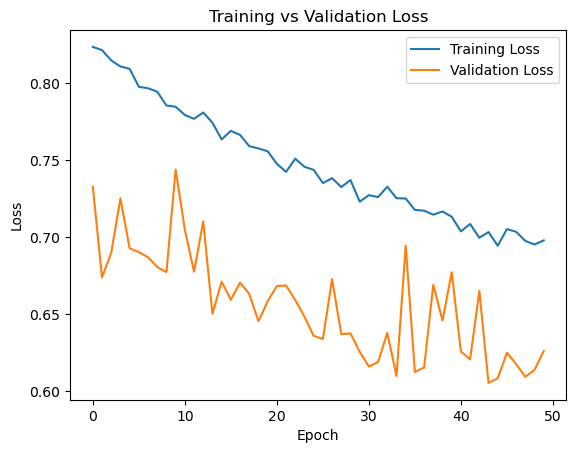

In [119]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy at each epoch

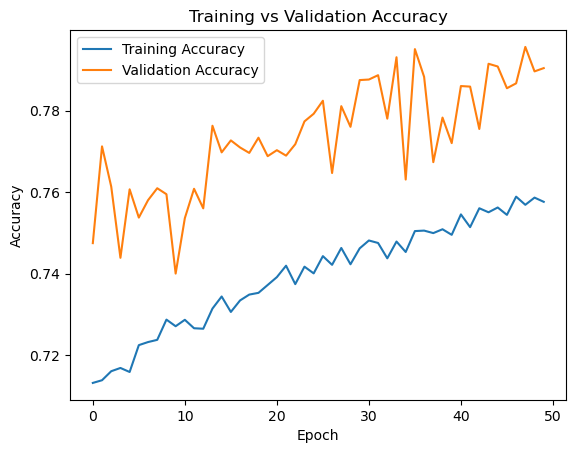

In [120]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

# Evaluate the model

In [121]:
loss, accuracy = model.evaluate(test_images, test_labels)
print('Test accuracy:', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7912 - loss: 0.6271
Test accuracy: 0.7868000268936157


# Classification report

In [122]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = np.argmax(model.predict(test_images), axis=1)
print(classification_report(test_labels, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
              precision    recall  f1-score   support

           0       0.86      0.78      0.82      1000
           1       0.86      0.92      0.89      1000
           2       0.75      0.66      0.70      1000
           3       0.67      0.61      0.64      1000
           4       0.75      0.75      0.75      1000
           5       0.74      0.70      0.72      1000
           6       0.68      0.90      0.78      1000
           7       0.85      0.80      0.82      1000
           8       0.88      0.87      0.88      1000
           9       0.83      0.88      0.86      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



# Confusion Matrix through Heatmap

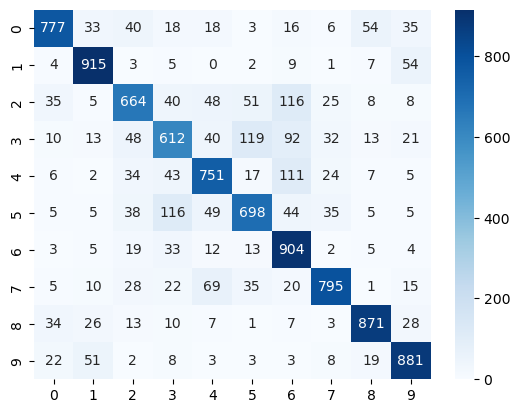

In [125]:
import seaborn as sns
cm = confusion_matrix(test_labels, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

# Visualize some predictions vs actual labels

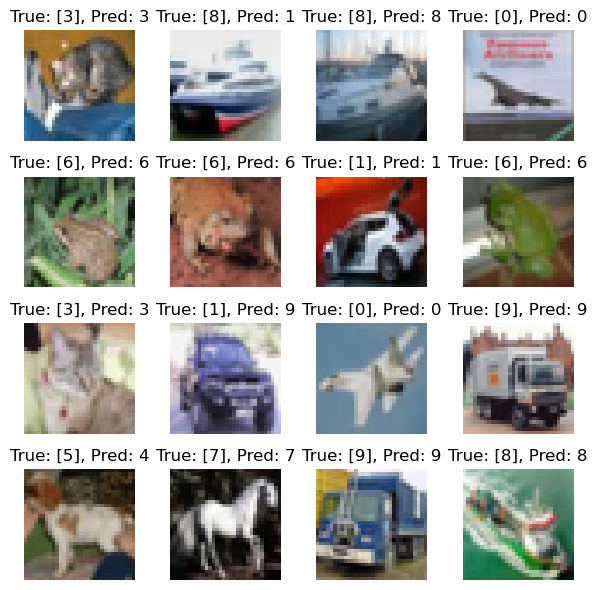

In [128]:
def plot_images(images, labels, predictions=None):
    fig, axes = plt.subplots(4, 4, figsize=(6,6))
    axes = axes.flatten()
    for i, ax in enumerate(axes):
        ax.imshow(images[i])
        true_label = labels[i]
        pred_label = predictions[i] if predictions is not None else 'None'
        ax.set_title(f'True: {true_label}, Pred: {pred_label}')
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plot_images(test_images[:17], test_labels[:17], predictions=y_pred[:17])


# Questions and Answers

# 1) CNN Architecture:
# What layers did you choose and why?

* Convolution layer as it will extract spatial features and it is basically suitable for large image datasets.
* MaxPooling layers for reducing high dimensions
* Dropout Layer to prevent overfitting by randomly setting a fraction of inputs to zero during training.
* Fully Connected Layers (dense layers) to get final output

# 2) Model Training:

1) How does data augmentation affect performance?
* Data augmentation increases the diversity of the training set by modifying the images which helps in preventing overfitting.
2) How did you tune hyperparameters?
* Manually tune the hyperparameters as it is difficult to use GridSearch or any other technique with limited computational resource and by checking performance metrics on the validation set.

# 3) Evaluation:

1) Confusion Matrix Analysis:
* Certain classes may be misclassified more often due to visual similarities.
2) Overall Performance:
* The model achieves around 79% accuracy but struggles with certain classes due to overlapping features.
3) Improvements:
* Increase the number of filters or add more layers to retrieve granular level features.
* Use more advanced data augmentation techniques.

# Report: CNN Image Classification on CIFAR-10 Dataset

# Aim:
The objective was to develop and train a Convolutional Neural Network(CNN) to classify images from the CIFAR-10 dataset into 10 categories and evaluate its performance using precision, recall, F1-score, and accuracy metrics.

# Dataset:

* CIFAR-10 Dataset - A dataset consist of 60,000 images categorized into 10 different classes, such as airplanes,automobiles, birds, cats, dogs, etc.
* Dataset Split - 
* Training Set: 70%
* Validation Set: 15%
* Test Set: 15%

# Evaluation Metrics:
* Precision: Measures how many of the predicted positive instances were correct.
* Recall: Measures how many actual positive instances were correctly predicted.
* F1-Score: The harmonic mean of precision and recall.
* Accuracy: The overall proportion of correct predictions.          

# Class-wise Performance :
# Strong Performers
* Class 8 : Exhibited the highest precision (0.88) and recall(0.87), indicating robust performance in distinguishing this class.
* Class 1 : Achieved high recall (0.92) suggesting clear visual distinction in this category.
# Classes with Misclassifications
* Class 3 : Showed lower recall (0.61) and F1-score (0.64), indicating difficulties in correctly identifying these images.

# Results:
* Overall Accuracy: 79%
* CNN achieved an accuracy of 79%, which denotes a moderate performance on the CIFAR-10 dataset.

# Suggestions to improve the performance of the model:

1) Adding more convolutional layers or applying transfer learning techniques could enable the model to learn more complex features and improve the overall performance.
2) Hyperparameter Tuning can be done by experimenting with different filters, optimizers, epochs for better performance.
3) Addressing Class Imbalances using techniques like class weighting or SMOTE or undersampling to ensure all classes are equally represented during training.